<h1>Prevendo o número de casos de COVID-19 em Uberaba usando Python</h1>

<h2>Bibliotecas</h2>

In [47]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from datetime import datetime, timedelta

<h2>Dados</h2>

Fonte: https://coviduberaba.github.io/

In [48]:
# Carregando os dados
df = pd.read_csv("data.csv")
df.head()

,Data,Total Confirmados,Recuperados,Total Diário,Óbitos,Casos Ativos
0,"Mar 16, 2020",1,0,1,0,1
1,"Mar 17, 2020",1,0,0,0,1
2,"Mar 18, 2020",3,0,2,0,3
3,"Mar 19, 2020",3,0,0,0,3
4,"Mar 20, 2020",3,0,0,0,3


<h2>Preparação dos dados</h2>

In [49]:
# criando um índice de data
df.index = pd.to_datetime(df.Data, infer_datetime_format=True)
df.drop("Data", 1, inplace=True)

# selecionando apenas coluna de "Total Confirmados"
df = df[["Total Confirmados"]]

# renomeando a coluna para "total"
df.columns = ["total"]

# visualiando as 5 primeiras linhas do conjunto de dados
df.head()

,total
Data,
2020-03-16,1
2020-03-17,1
2020-03-18,3
2020-03-19,3
2020-03-20,3


<h2>Explorando os dados</h2>

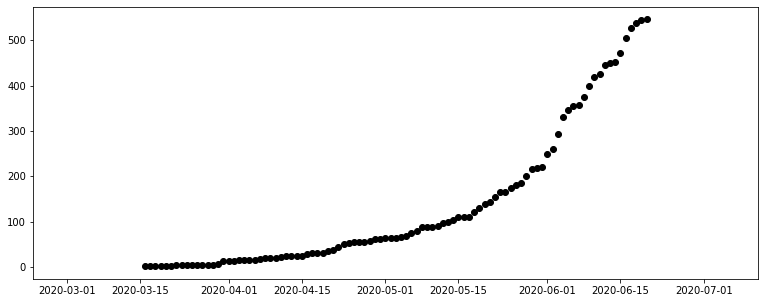

In [50]:
fig, ax = plt.subplots(figsize=(13,5))
ax.scatter(
    df["total"].index,
    df["total"].values,
    color="black"
)
plt.show()

<h2>Modelagem usando a curva exponencial</h2>

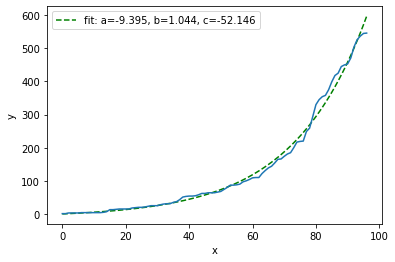

In [58]:
# funcão exponecial com parâmetros a, b e c
def exp_func(X, a, b, c):
    y = a + b**(X-c)
    return y

# otimização usando scipy
popt, pcov = optimize.curve_fit(exp_func, np.arange(len(df["total"])), df["total"].values)

# gráfico
plt.plot(np.arange(len(df["total"])), exp_func(np.arange(len(df["total"])), *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(np.arange(len(df["total"])), df["total"].values)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [62]:
# criando função pra converter data em dias
def data_to_days(date):
    x = (date - df.index[-1]).days + len(df['total'])
    return x

# criando o modelo usando os parâmetros ajustados
def exp_model(X):
    X = data_to_days(X)
    y = -9.395 + 1.044 ** (X - (-52.146))
    return int(y)

tomorrow = datetime.today() + timedelta(days=1)
after_tomorrow = datetime.today() + timedelta(days=2)

print("Amanhã:", exp_model(tomorrow))
print("Depois de amanhã:", exp_model(after_tomorrow))

Amanhã: 690
Depois de amanhã: 721


<h2>Modelagem usando a curva gaussiana</h2>

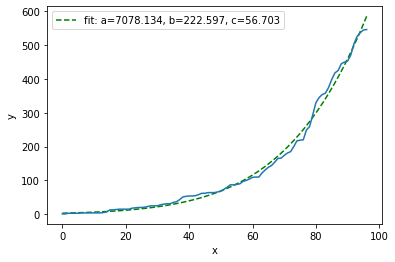

In [63]:
# funcão gaussiana com parâmetros a, b e c
def gaussian_func(X, a, b, c):
    y = a * np.exp( -(X-b)**2 / (2*c**2) )
    return y

# otimização usando scipy
popt, pcov = optimize.curve_fit(gaussian_func, np.arange(len(df["total"])), df["total"].values)

# gráfico
plt.plot(np.arange(len(df["total"])), gaussian_func(np.arange(len(df["total"])), *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(np.arange(len(df["total"])), df["total"].values)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [65]:
# criando o modelo usando os parâmetros ajustados
def gaussian_model(X):
    X = data_to_days(X)
    y = 7078.134 * np.exp( -(X-222.597)**2 / (2*56.703**2) )
    return int(y)

tomorrow = datetime.today() + timedelta(days=1)
after_tomorrow = datetime.today() + timedelta(days=2)

print("Amanhã:", gaussian_model(tomorrow))
print("Depois de amanhã:", gaussian_model(after_tomorrow))

Amanhã: 683
Depois de amanhã: 710
